In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk, spacy
from sklearn.feature_extraction.text import TfidfVectorizer

### Exploration des données

In [3]:
movies_df = pd.read_csv('../data/cleaned_movies.csv')
movies_df.head()

,Title,Overview,Tagline,Homepage,Release_Date,Vote_Average,Runtime,Poster_Path,Genres,Keywords,Director,budget,revenue,production_companies,Cast
0,Inception,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,https://www.warnerbros.com/movies/inception,2010-07-15,8.364,148,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,"Action, Science Fiction, Adventure","[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",Christopher Nolan,160000000,825532764,"Legendary Pictures, Warner Bros., Syncopy","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen..."
1,Interstellar,The adventures of a group of explorers who mak...,Mankind was born on Earth. It was never meant ...,http://www.interstellarmovie.net/,2014-11-05,8.417,169,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,"Adventure, Drama, Science Fiction","[{""id"": 83, ""name"": ""saving the world""}, {""id""...",Christopher Nolan,165000000,675120017,"Paramount Pictures, Legendary Pictures, Warner...","Matthew McConaughey, Jessica Chastain, Anne Ha..."
2,The Dark Knight,Batman raises the stakes in his war on crime. ...,Welcome to a world without rules.,https://www.warnerbros.com/movies/dark-knight/,2008-07-16,8.512,152,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,"Drama, Action, Crime, Thriller","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Christopher Nolan,185000000,1004558444,"DC Comics, Legendary Pictures, Warner Bros., D...","Christian Bale, Heath Ledger, Aaron Eckhart"
3,Avatar,"In the 22nd century, a paraplegic Marine is di...",Enter the world of Pandora.,https://www.avatar.com/movies/avatar,2009-12-15,7.573,162,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"Action, Adventure, Fantasy, Science Fiction","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",James Cameron,237000000,2787965087,"Ingenious Film Partners, Twentieth Century Fox...","Sam Worthington, Zoe Saldana, Sigourney Weaver"
4,The Avengers,When an unexpected enemy emerges and threatens...,Some assembly required.,https://www.marvel.com/movies/the-avengers,2012-04-25,7.710,143,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,"Science Fiction, Action, Adventure","[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",Joss Whedon,220000000,1519557910,"Paramount Pictures, Marvel Studios","Robert Downey Jr., Chris Evans, Mark Ruffalo"


In [4]:
# 1. Aperçu général
print("Dimensions :", movies_df.shape)
print("\nColonnes :", movies_df.columns)
print("\nTypes de données :\n", movies_df.dtypes)

Dimensions : (4771, 15)

Colonnes : Index(['Title', 'Overview', 'Tagline', 'Homepage', 'Release_Date',
       'Vote_Average', 'Runtime', 'Poster_Path', 'Genres', 'Keywords',
       'Director', 'budget', 'revenue', 'production_companies', 'Cast'],
      dtype='object')

Types de données :
 Title                    object
Overview                 object
Tagline                  object
Homepage                 object
Release_Date             object
Vote_Average            float64
Runtime                   int64
Poster_Path              object
Genres                   object
Keywords                 object
Director                 object
budget                    int64
revenue                   int64
production_companies     object
Cast                     object
dtype: object


In [5]:
# 3. Statistiques descriptives pour les colonnes numériques
print("\nStatistiques numériques :")
print(movies_df.describe())


Statistiques numériques :
       Vote_Average      Runtime        budget       revenue
count   4771.000000  4771.000000  4.771000e+03  4.771000e+03
mean       6.321060   107.573674  2.923619e+07  8.280760e+07
std        0.964157    20.845377  4.079101e+07  1.632646e+08
min        0.000000     0.000000  0.000000e+00  0.000000e+00
25%        5.821000    94.000000  9.500000e+05  0.000000e+00
50%        6.392000   104.000000  1.500000e+07  1.947811e+07
75%        6.940500   118.000000  4.000000e+07  9.365850e+07
max       10.000000   339.000000  3.800000e+08  2.787965e+09


In [6]:
# 4. Vérifier les valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(movies_df.isnull().sum())


Valeurs manquantes par colonne :
Title                   0
Overview                0
Tagline                 0
Homepage                0
Release_Date            0
Vote_Average            0
Runtime                 0
Poster_Path             0
Genres                  0
Keywords                0
Director                0
budget                  0
revenue                 0
production_companies    0
Cast                    0
dtype: int64



Top 10 genres les plus fréquents :
Genres
Drama                     323
Comedy                    240
Drama, Romance            167
Comedy, Romance           166
Comedy, Drama             143
Comedy, Drama, Romance    106
Horror, Thriller           71
Documentary                63
Horror                     62
Drama, Thriller            58
Name: count, dtype: int64


<Axes: xlabel='Genres'>

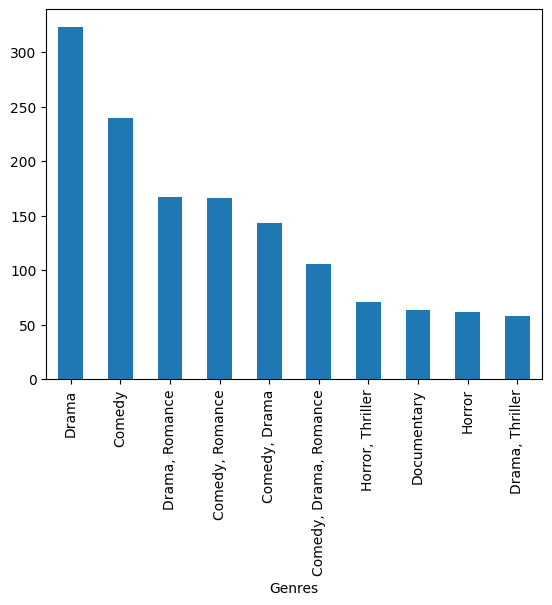

In [7]:
# 5. Distribution des genres
print("\nTop 10 genres les plus fréquents :")
print(movies_df['Genres'].value_counts().head(10))
movies_df['Genres'].value_counts().head(10).plot(kind='bar')


### Prétraitement NLP (tests)

In [72]:
import spacy
import string

# Charger le modèle anglais
nlp = spacy.load('en_core_web_sm')

text = "Christopher Nolan directed Inception and Interstellar 2020."

text = text.lower()

# Suppression de la ponctuation
text = text.translate(str.maketrans('', '', string.punctuation))

# Traitement NLP
doc = nlp(text)

# Suppression des stopwords + lemmatisation
# Sans lemmatisation (juste suppression des stopwords)
no_lemma = [token.text for token in doc if not token.is_stop]

# Avec lemmatisation
with_lemma = [token.lemma_ for token in doc if not token.is_stop]

print("Sans lemmatisation :", no_lemma)
print("Avec lemmatisation :", with_lemma)

Sans lemmatisation : ['christopher', 'nolan', 'directed', 'inception', 'interstellar', '2020']
Avec lemmatisation : ['christopher', 'nolan', 'direct', 'inception', 'interstellar', '2020']


### Indexation et TF-IDF (expérimentation)

Échantillon de textes utilisés :
 964     The BFG is no ordinary bone-crunching giant. H...
3741    Bucum Jackson (Cube) is a bounty hunter with a...
2600    Dawn is an active member of her high-school ch...
3970    The story of an idle rich boy who joins the US...
598     A former Prohibition-era Jewish gangster retur...
Name: Overview, dtype: object 

Matrice TF-IDF :


,60,active,answer,army,artist,attitude,avoiding,bail,bfg,bloodbottler,...,van,wallet,war,warfare,winner,work,working,world,wright,years
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.448958,0.149653,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
1,0.091572,0.000000,0.000000,0.000000,0.091572,0.091572,0.091572,0.091572,0.000000,0.000000,...,0.183144,0.091572,0.000000,0.000000,0.091572,0.091572,0.07388,0.000000,0.274716,0.000000
2,0.000000,0.193706,0.193706,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.202853,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.202853,0.202853,0.000000,0.000000,0.16366,0.202853,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.252773



Mots les plus importants pour le film 1 :
bfg          0.448958
sophie       0.299306
giants       0.299306
nice         0.299306
decides      0.149653
soon         0.149653
chiddlers    0.149653
middle       0.149653
giant        0.149653
night        0.149653
Name: 0, dtype: float64


<Axes: title={'center': 'Top TF-IDF words'}>

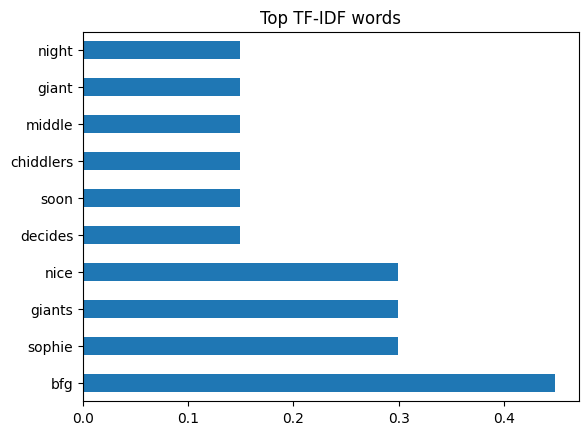

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Prendre un petit échantillon (ex : 5 films)
sample_df = movies_df.sample(5, random_state=42)

# Choisir la colonne texte (ex : résumé ou titre)
sample_texts = sample_df['Overview']  

# Appliquer TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(sample_texts)

# Créer une DataFrame TF-IDF
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Affichage
print("Échantillon de textes utilisés :\n", sample_texts, "\n")
print("Matrice TF-IDF :")
display(tfidf_df)

# Vérification des mots les plus importants dans un texte donné
idx = 0  # premier film
important_words = tfidf_df.iloc[idx].sort_values(ascending=False).head(10)
print("\nMots les plus importants pour le film 1 :")
print(important_words)

important_words.plot(kind='barh', title='Top TF-IDF words')

### Test du modèle de similarité

Scores de similarité : [[0.10727705 0.07388737 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.09598349]]
🎬 Recommandations basées sur la requête :

                            Title                             Genres  \
964                       The BFG         Adventure, Family, Fantasy   
4192  In the Name of the King III  Action, Adventure, Drama, Fantasy   
3741      All About the Benjamins          Action, Adventure, Comedy   
802                Before Sunrise                     Drama, Romance   
4534                      The Pet                    Drama, Thriller   

     Release_Date  
964    2016-06-01  
4192   2014-02-05  
3741   2002-03-08  
802    1995-01-27  
4534   2006-05-17  


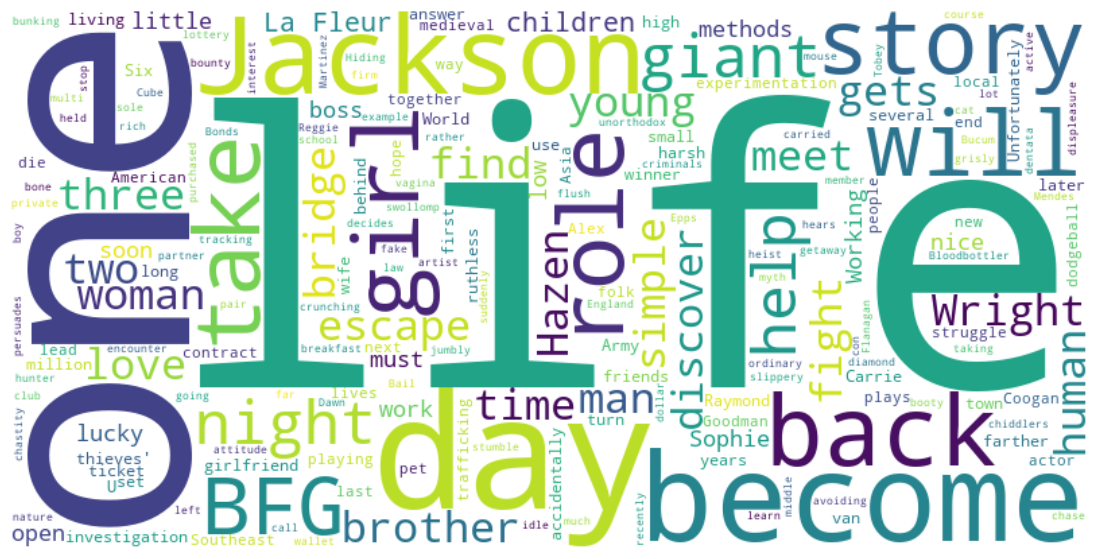

In [71]:
from sklearn.metrics.pairwise import cosine_similarity

# Charger SpaCy
nlp = spacy.load('en_core_web_sm')

# 🔹 Fonction de nettoyage NLP
def clean_text(text):
    if pd.isnull(text):
        return ""
    # minuscules
    text = text.lower()
    # suppression ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # NLP
    doc = nlp(text)
    # suppression stopwords + lemmatisation
    return " ".join([token.lemma_ for token in doc if not token.is_stop])

# Charger les données
movies_df = pd.read_csv('../data/cleaned_movies.csv')

# Échantillon de 20 films
films = movies_df.sample(20, random_state=42)

# Appliquer le nettoyage sur la colonne texte (overview / description)
films['text_for_vector'] = (
    films['Title'].fillna('') + ' ' +
    films['Genres'].fillna('') + ' ' +
    films['Overview'].fillna('') + ' ' +
    films['Release_Date'].fillna('')
).apply(clean_text)

# TF-IDF Vectorization sur les textes nettoyés
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(films['text_for_vector'])

# 🔍 Simulation d'une requête utilisateur
query = vectorizer.transform(["Adventure movie released in 2002"])

# Similarité cosinus entre la requête et tous les films
scores = cosine_similarity(query, X)
print("Scores de similarité :", scores)

# 🔝 Sélection des 5 films les plus similaires
top_indices = scores[0].argsort()[-5:][::-1]

# Affichage des résultats
print("🎬 Recommandations basées sur la requête :\n")
print(films.iloc[top_indices][['Title', 'Genres', 'Release_Date']])

# WordCloud sur les descriptions des films
overview_text = ' '.join(films['Overview'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(overview_text)

# Pour afficher le WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

